<a href="https://colab.research.google.com/github/ZulfikarAkbar06/tugas1/blob/main/Tugas_Praktikum_Struktur_Data_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== TUGAS 1: Graf dengan Siklus ===
Jarak terpendek dari A ke Z: 14
Jalur terpendek: A -> B -> D -> E -> Z


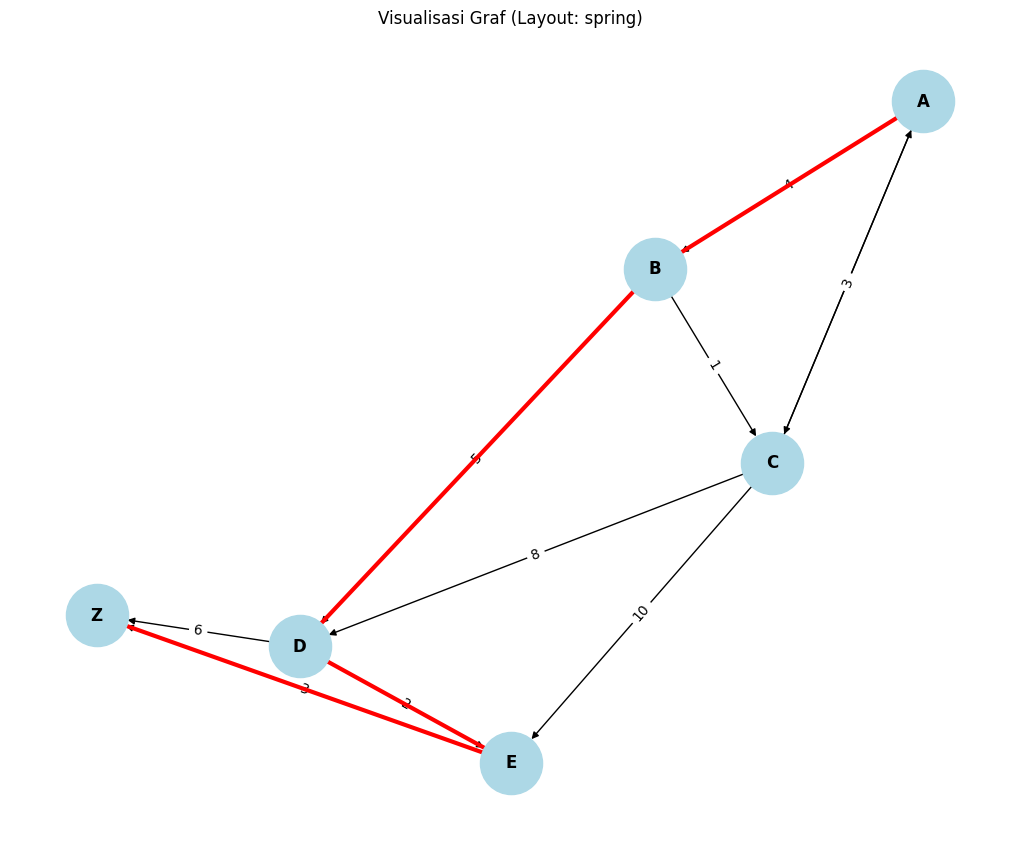


=== TUGAS 2: Graf dengan Simpul Baru ===
Jarak terpendek dari A ke Z: 11
Jalur terpendek: A -> F -> E -> Z


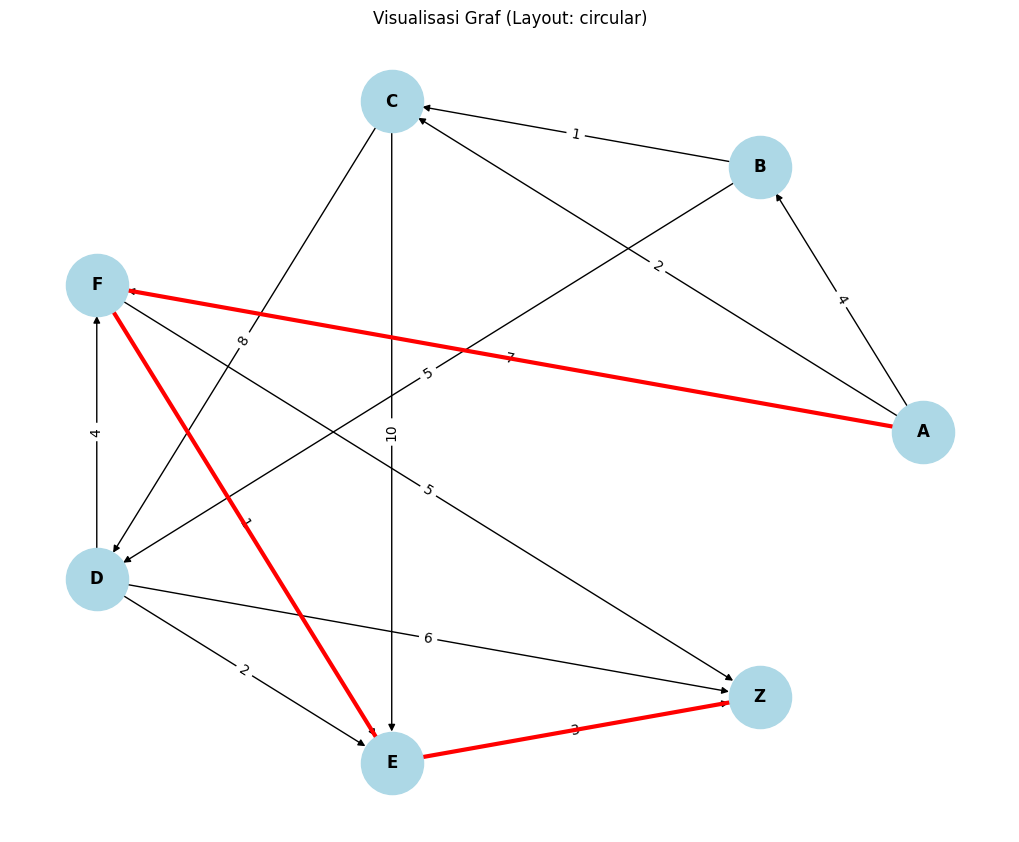


=== TUGAS 3: Visualisasi dengan Layout Berbeda ===
1. Spring Layout:


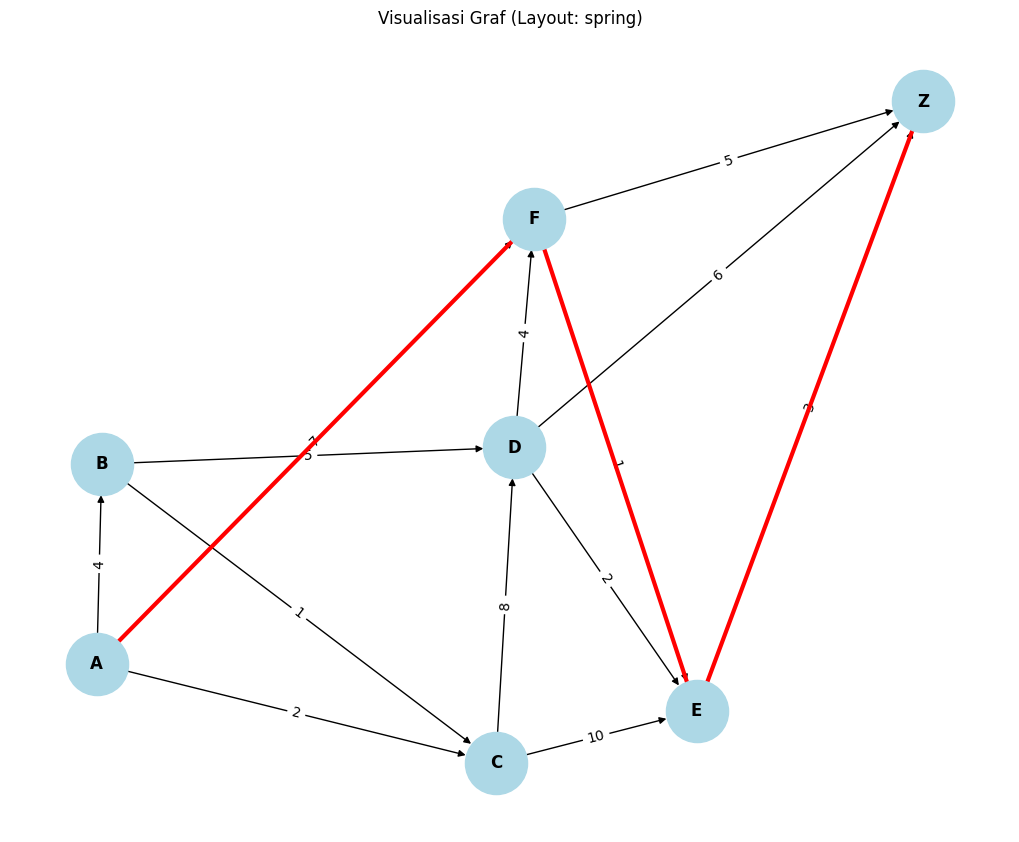

2. Circular Layout:


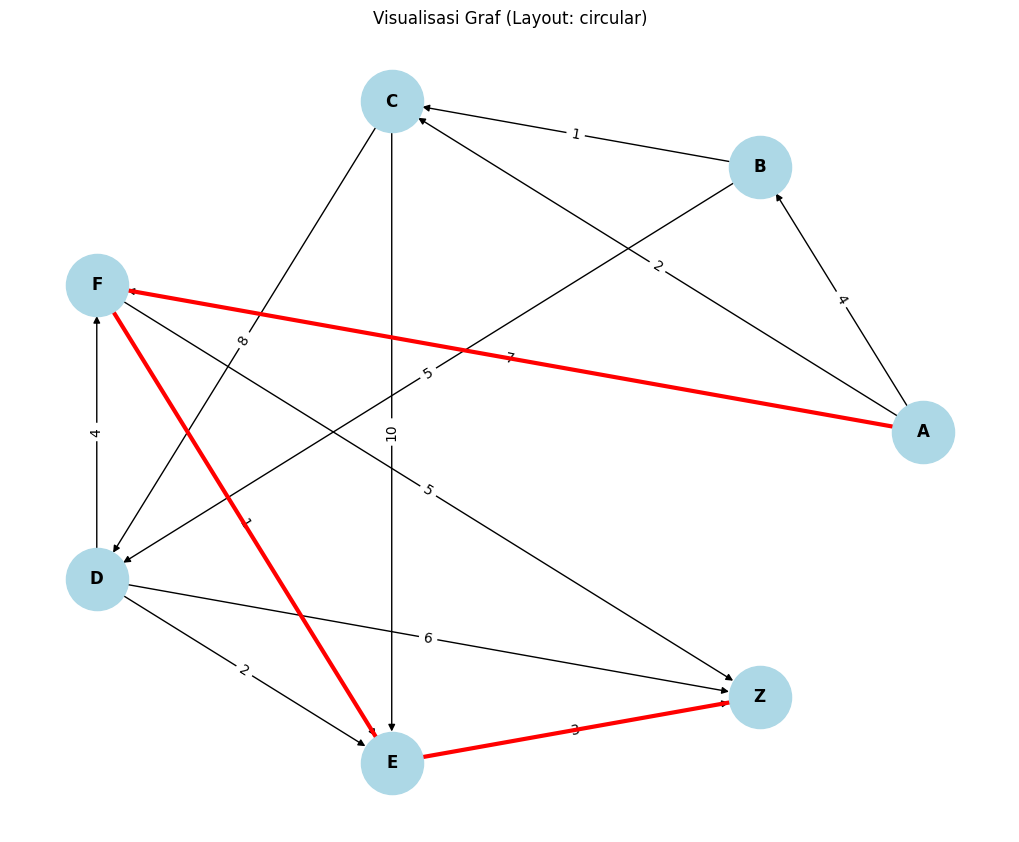

3. Kamada-Kawai Layout:


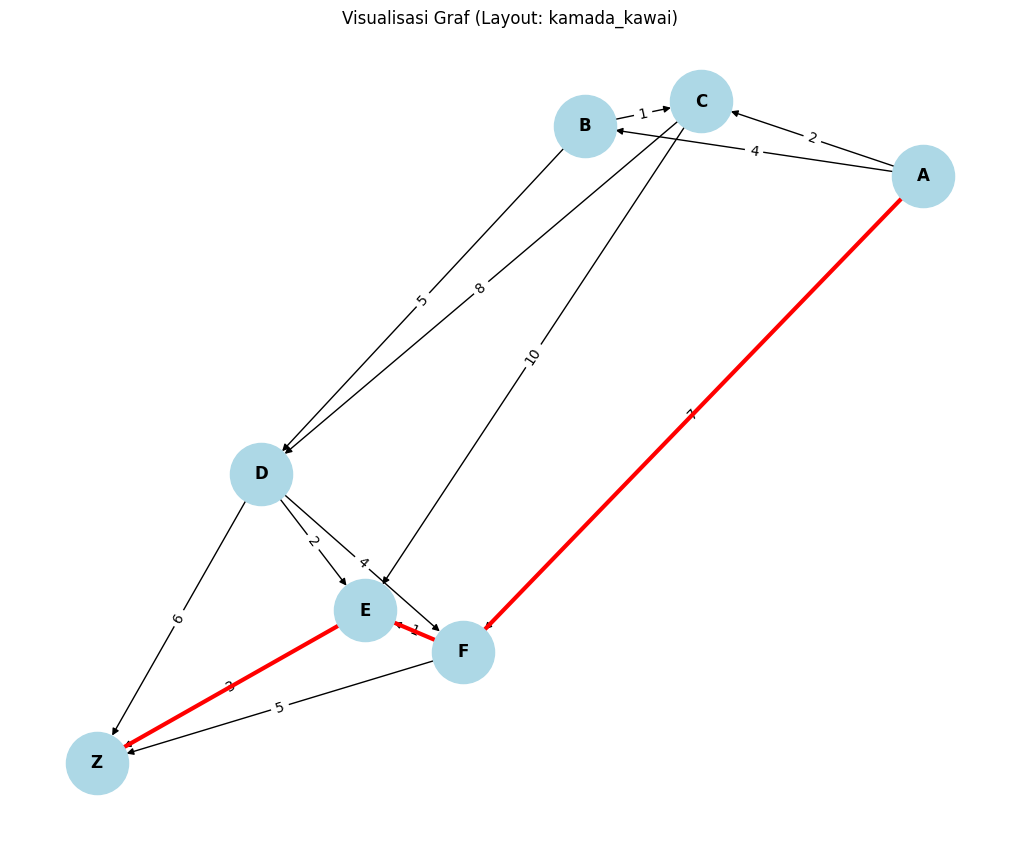

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None, layout='spring'):
    G = nx.DiGraph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    if layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',
                              width=3)

    plt.title(f"Visualisasi Graf (Layout: {layout})")
    plt.axis('off')
    plt.show()

def main():

    # TUGAS 1: Graf dengan siklus
    print("\n=== TUGAS 1: Graf dengan Siklus ===")
    graph_with_cycle = {
        'A': {'B': 4, 'C': 2},
        'B': {'C': 1, 'D': 5},
        'C': {'A': 3, 'D': 8, 'E': 10},
        'D': {'E': 2, 'Z': 6},
        'E': {'Z': 3},
        'Z': {}
    }

    start_node = 'A'
    end_node = 'Z'

    distances_cycle, previous_cycle = dijkstra_with_paths(graph_with_cycle, start_node)
    shortest_path_cycle = get_path(previous_cycle, end_node)

    print(f"Jarak terpendek dari {start_node} ke {end_node}: {distances_cycle[end_node]}")
    print(f"Jalur terpendek: {' -> '.join(shortest_path_cycle)}")

    visualize_graph(graph_with_cycle, path=shortest_path_cycle, layout='spring')


    # TUGAS 2: Graf dengan simpul baru
    print("\n=== TUGAS 2: Graf dengan Simpul Baru ===")
    graph_with_new_node = {
        'A': {'B': 4, 'C': 2, 'F': 7},
        'B': {'C': 1, 'D': 5},
        'C': {'D': 8, 'E': 10},
        'D': {'E': 2, 'Z': 6, 'F': 4},
        'E': {'Z': 3},
        'F': {'E': 1, 'Z': 5},
        'Z': {}
    }

    distances_new_node, previous_new_node = dijkstra_with_paths(graph_with_new_node, start_node)
    shortest_path_new_node = get_path(previous_new_node, end_node)

    print(f"Jarak terpendek dari {start_node} ke {end_node}: {distances_new_node[end_node]}")
    print(f"Jalur terpendek: {' -> '.join(shortest_path_new_node)}")

    visualize_graph(graph_with_new_node, path=shortest_path_new_node, layout='circular')

    # TUGAS 3: Visualisasi dengan layout berbeda
    print("\n=== TUGAS 3: Visualisasi dengan Layout Berbeda ===")
    print("1. Spring Layout:")
    visualize_graph(graph_with_new_node, path=shortest_path_new_node, layout='spring')

    print("2. Circular Layout:")
    visualize_graph(graph_with_new_node, path=shortest_path_new_node, layout='circular')

    print("3. Kamada-Kawai Layout:")
    visualize_graph(graph_with_new_node, path=shortest_path_new_node, layout='kamada_kawai')

if __name__ == "__main__":
    main()